In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Utils import Processing
from Models import ANN_1, ConvMassimo

from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

importlib.reload(Processing)
importlib.reload(ANN_1)

2023-10-02 11:16:55.733733: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 11:16:55.764111: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-02 11:16:55.764142: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-02 11:16:55.764164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-02 11:16:55.769630: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 11:16:55.770035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

<module 'Models.ANN_1' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Models/ANN_1.py'>

In [2]:
class_weight=Processing.class_weights()
class_weight

{'ModerateDemented': 1.0,
 'VeryMildDemented': 0.008885850991114148,
 'MildDemented': 0.05329445078399054,
 'NonDemented': 0.0}

In [3]:
X_train = np.load('PCA_Data/X_train_pca.npy')
y_train = np.load('PCA_Data/y_train.npy')
labels_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca.npy')
y_test = np.load('PCA_Data/y_test.npy')
labels_test = np.load('PCA_Data/labels_list_test.npy')

In [4]:
np.unique(labels_train, return_counts=True)

(array(['MildDemented', 'ModerateDemented', 'NonDemented',
        'VeryMildDemented'], dtype='<U16'),
 array([ 717,   52, 2560, 1792]))

In [5]:
np.unique(labels_test, return_counts=True)

(array(['MildDemented', 'ModerateDemented', 'NonDemented',
        'VeryMildDemented'], dtype='<U16'),
 array([179,  12, 640, 448]))

In [6]:
y_train = (y_train + 0.1) ** 2
y_train

array([[0.02349919],
       [0.01185613],
       [0.01185613],
       ...,
       [0.01185613],
       [0.01185613],
       [0.02349919]])

In [7]:
np.unique(y_train, return_counts=True)

(array([0.01      , 0.01185613, 0.02349919, 1.21      ]),
 array([2560, 1792,  717,   52]))

In [8]:
#df_label_weight = pd.DataFrame(labels_train)
#df_label_weight

In [9]:
# normalize with min-max normalization using sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
# X_train = X_train.reshape(-1, 27, 27)
# X_test = X_test.reshape(-1, 27, 27)
# normalize each image with min-max normalization
#for i in range(len(X_train)):
#    max = X_train[i].max()
#    min = X_train[i].min()
#    X_train[i] = (X_train[i] - min) / (max - min)
#
#for i in range(len(X_test)):
#    max = X_test[i].max()
#    min = X_test[i].min()
#    X_test[i] = (X_test[i] - min) / (max - min)

In [11]:
# validation_percentage = 0.0
# X_val = X_train[int(1-validation_percentage * len(X_train)):]
# X_train = X_train[:int(1-validation_percentage * len(X_train))]
# y_val = y_train[int(1-validation_percentage * len(y_train)):]
# y_train = y_train[:int(1-validation_percentage * len(y_train))]
# labels_val = labels_train[int(1-validation_percentage * len(labels_train)):]
# labels_train = labels_train[:int(1-validation_percentage * len(labels_train))]

In [12]:
# np.unique(labels_train, return_counts=True)

In [13]:
# np.unique(labels_val, return_counts=True)

In [14]:
# one hot encoding df_labels_
df_labels_train = pd.DataFrame(labels_train, columns=['label'])
df_labels_train = pd.get_dummies(df_labels_train['label'])
df_labels_train = df_labels_train.astype(int)
df_labels_train = df_labels_train[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]

# df_labels_val = pd.DataFrame(labels_val, columns=['label'])
# df_labels_val = pd.get_dummies(df_labels_val['label'])
# df_labels_val = df_labels_val.astype(int)
# df_labels_val = df_labels_val[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]

df_labels_test = pd.DataFrame(labels_test, columns=['label'])
df_labels_test = pd.get_dummies(df_labels_test['label'])
df_labels_test = df_labels_test.astype(int)
df_labels_test = df_labels_test[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]

In [15]:
df_train = pd.DataFrame(X_train)
#df_val = pd.DataFrame(X_val)
df_test = pd.DataFrame(X_test)

In [16]:
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
#df_val_scaled = pd.DataFrame(scaler.transform(df_val))
df_test_scaled = pd.DataFrame(scaler.transform(df_test))

In [17]:
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,-0.679516,0.009893,-0.772439,0.399707,1.147609,-0.258136,-0.179097,0.106501,-0.545358,0.211390,...,-0.399347,-0.477501,1.949948,1.545586,-1.111217,-1.021542,-1.315842,-0.376497,0.381980,-0.387918
1,-0.212022,-0.950237,-1.334794,-0.564601,0.374589,-1.314234,0.079849,2.411654,-0.569428,-2.019876,...,-1.104447,-0.214066,-0.326975,-0.053153,-0.144306,0.649506,0.116568,0.052974,1.047673,0.525500
2,1.600569,0.714565,0.493042,-1.622309,-0.620615,-1.415203,-0.889979,-0.718949,0.978008,0.331619,...,-0.449442,-0.510083,0.130651,0.498805,-0.772928,-0.423373,-0.967058,-0.368068,-2.217040,0.957270
3,-0.700215,2.219761,0.038706,-1.180016,0.290513,1.418285,1.064722,2.057123,0.923677,-0.290236,...,-1.372191,0.298311,-0.149917,-1.012201,-1.263251,-0.379964,1.242228,1.762233,0.460587,-0.926380
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,1.070932,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,-0.048152,0.829236,-1.294559,-1.181034,-1.181797,2.127548,-0.059401,1.430113,-1.486170,-0.534020,...,0.003369,1.432892,-0.205263,-0.703559,0.367918,-0.024764,0.129488,-1.277935,0.713984,1.506694
5117,-1.168121,0.676574,-0.097522,-1.908389,0.881875,0.982307,1.985875,-0.557928,-0.085431,-0.680419,...,-1.970960,2.064680,-0.113812,-0.361045,-0.540311,-1.119374,-0.614035,-0.766475,-1.735159,-0.411397
5118,0.413134,0.316473,-1.761885,-1.545644,-1.630397,0.810978,-0.792975,1.174505,1.001042,-0.295810,...,0.048921,-1.309492,1.082047,-1.653453,2.019602,0.385491,-1.673099,0.749720,0.156015,-0.816803
5119,0.169920,1.750565,-0.650258,0.866130,-0.984723,-0.239942,-0.964367,2.038580,-0.676149,0.834294,...,1.226068,0.787158,-0.300324,-0.959101,-1.204706,0.744915,0.511545,-0.375208,1.760648,0.028309


In [18]:
df_train_scaled['label'] = labels_train
#df_val_scaled['label'] = labels_val
df_test_scaled['label'] = labels_test

In [19]:
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,label
0,-0.679516,0.009893,-0.772439,0.399707,1.147609,-0.258136,-0.179097,0.106501,-0.545358,0.211390,...,-0.477501,1.949948,1.545586,-1.111217,-1.021542,-1.315842,-0.376497,0.381980,-0.387918,MildDemented
1,-0.212022,-0.950237,-1.334794,-0.564601,0.374589,-1.314234,0.079849,2.411654,-0.569428,-2.019876,...,-0.214066,-0.326975,-0.053153,-0.144306,0.649506,0.116568,0.052974,1.047673,0.525500,VeryMildDemented
2,1.600569,0.714565,0.493042,-1.622309,-0.620615,-1.415203,-0.889979,-0.718949,0.978008,0.331619,...,-0.510083,0.130651,0.498805,-0.772928,-0.423373,-0.967058,-0.368068,-2.217040,0.957270,VeryMildDemented
3,-0.700215,2.219761,0.038706,-1.180016,0.290513,1.418285,1.064722,2.057123,0.923677,-0.290236,...,0.298311,-0.149917,-1.012201,-1.263251,-0.379964,1.242228,1.762233,0.460587,-0.926380,VeryMildDemented
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405,NonDemented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,-0.048152,0.829236,-1.294559,-1.181034,-1.181797,2.127548,-0.059401,1.430113,-1.486170,-0.534020,...,1.432892,-0.205263,-0.703559,0.367918,-0.024764,0.129488,-1.277935,0.713984,1.506694,ModerateDemented
5117,-1.168121,0.676574,-0.097522,-1.908389,0.881875,0.982307,1.985875,-0.557928,-0.085431,-0.680419,...,2.064680,-0.113812,-0.361045,-0.540311,-1.119374,-0.614035,-0.766475,-1.735159,-0.411397,VeryMildDemented
5118,0.413134,0.316473,-1.761885,-1.545644,-1.630397,0.810978,-0.792975,1.174505,1.001042,-0.295810,...,-1.309492,1.082047,-1.653453,2.019602,0.385491,-1.673099,0.749720,0.156015,-0.816803,VeryMildDemented
5119,0.169920,1.750565,-0.650258,0.866130,-0.984723,-0.239942,-0.964367,2.038580,-0.676149,0.834294,...,0.787158,-0.300324,-0.959101,-1.204706,0.744915,0.511545,-0.375208,1.760648,0.028309,VeryMildDemented


In [20]:
df_labels_train

,NonDemented,VeryMildDemented,MildDemented,ModerateDemented
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
5116,0,0,0,1
5117,0,1,0,0
5118,0,1,0,0
5119,0,1,0,0


In [21]:
remove_columns = ['label']
df_train_scaled = df_train_scaled.drop(remove_columns, axis=1)
#df_val_scaled = df_val_scaled.drop(remove_columns, axis=1)
df_test_scaled = df_test_scaled.drop(remove_columns, axis=1)

df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,-0.679516,0.009893,-0.772439,0.399707,1.147609,-0.258136,-0.179097,0.106501,-0.545358,0.211390,...,-0.399347,-0.477501,1.949948,1.545586,-1.111217,-1.021542,-1.315842,-0.376497,0.381980,-0.387918
1,-0.212022,-0.950237,-1.334794,-0.564601,0.374589,-1.314234,0.079849,2.411654,-0.569428,-2.019876,...,-1.104447,-0.214066,-0.326975,-0.053153,-0.144306,0.649506,0.116568,0.052974,1.047673,0.525500
2,1.600569,0.714565,0.493042,-1.622309,-0.620615,-1.415203,-0.889979,-0.718949,0.978008,0.331619,...,-0.449442,-0.510083,0.130651,0.498805,-0.772928,-0.423373,-0.967058,-0.368068,-2.217040,0.957270
3,-0.700215,2.219761,0.038706,-1.180016,0.290513,1.418285,1.064722,2.057123,0.923677,-0.290236,...,-1.372191,0.298311,-0.149917,-1.012201,-1.263251,-0.379964,1.242228,1.762233,0.460587,-0.926380
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,1.070932,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,-0.048152,0.829236,-1.294559,-1.181034,-1.181797,2.127548,-0.059401,1.430113,-1.486170,-0.534020,...,0.003369,1.432892,-0.205263,-0.703559,0.367918,-0.024764,0.129488,-1.277935,0.713984,1.506694
5117,-1.168121,0.676574,-0.097522,-1.908389,0.881875,0.982307,1.985875,-0.557928,-0.085431,-0.680419,...,-1.970960,2.064680,-0.113812,-0.361045,-0.540311,-1.119374,-0.614035,-0.766475,-1.735159,-0.411397
5118,0.413134,0.316473,-1.761885,-1.545644,-1.630397,0.810978,-0.792975,1.174505,1.001042,-0.295810,...,0.048921,-1.309492,1.082047,-1.653453,2.019602,0.385491,-1.673099,0.749720,0.156015,-0.816803
5119,0.169920,1.750565,-0.650258,0.866130,-0.984723,-0.239942,-0.964367,2.038580,-0.676149,0.834294,...,1.226068,0.787158,-0.300324,-0.959101,-1.204706,0.744915,0.511545,-0.375208,1.760648,0.028309


In [22]:
#df_val_scaled

In [23]:
df_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,1.219531,-1.505233,1.680178,-0.050038,2.527566,1.350202,-3.361946,0.655431,-1.575696,1.003864,...,-0.260738,2.867015,-0.516099,1.253585,2.182510,0.731913,0.385899,-0.304856,-1.363730,-1.015007
1,1.136353,-1.710098,1.556370,0.114951,2.356358,1.624722,-2.366725,0.488950,-0.463513,1.138651,...,-0.439551,1.443952,0.383409,0.017014,2.554813,-0.527543,1.556000,-1.703217,0.037160,0.230604
2,1.645219,0.243078,1.774107,-0.445000,1.799041,-0.723878,-2.480800,-0.023685,1.693272,-2.388374,...,0.351460,0.952567,0.507997,0.929380,-1.212485,0.171813,-1.559582,1.668109,-1.993273,-0.449949
3,1.653526,0.298226,1.939594,-1.318499,0.247714,-1.358048,-3.264480,0.978953,0.347693,-1.680608,...,1.631381,3.660333,0.708801,1.507529,-0.227500,-2.885872,-0.841141,1.670479,1.246815,-0.938417
4,0.527049,-1.736484,1.569592,0.652118,2.646829,0.741024,-2.683594,1.583248,-1.814223,0.494121,...,0.621951,-0.367770,2.772741,-1.378584,0.104861,-0.012184,0.417423,0.084085,1.479384,1.373633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.732002,1.075651,2.155758,2.614568,2.837096,-0.243156,-3.385708,1.308632,-1.180526,0.038045,...,1.158489,1.198792,-0.857145,1.099790,1.593141,1.710448,1.445832,0.072019,-0.176554,-0.927340
1275,1.603434,0.697891,1.749198,-1.765728,0.383884,-1.713400,-3.369768,0.776461,0.606874,-1.075642,...,-1.133322,3.117718,-2.358381,1.786752,0.055858,1.014513,-0.334846,2.564641,-0.465842,-1.733768
1276,1.233897,0.089997,2.046959,-0.244362,2.129480,0.496291,-2.419153,-0.584149,1.570665,-0.712491,...,-0.710457,-0.080305,-1.379703,0.940705,-0.844031,-1.363346,0.132751,-1.318708,-0.342929,-0.799596
1277,1.151725,-1.053830,1.745563,0.823227,2.129511,1.211720,-2.163678,0.683904,-1.376077,1.924323,...,-0.998798,0.876691,1.665930,-1.375020,-0.419019,-0.616890,0.677804,-0.001128,-2.821622,-1.253502


In [24]:
print(X_train.shape)
print(y_train.shape)
#print(X_val.shape)
#print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(5121, 729)
(5121, 1)
(1279, 729)
(1279, 1)


In [25]:
print(len(df_train_scaled))
#print(len(df_val_scaled))

5121


In [26]:
#importlib.reload(ConvMassimo)
#model = ConvMassimo.build_Model(input_shape=(27,27,1))
#model.summary()

In [27]:
importlib.reload(ANN_1)
model = ANN_1.build_Model(input_shape=(27 * 27))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 729)]             0         
                                                                 
 flatten (Flatten)           (None, 729)               0         
                                                                 
 dense (Dense)               (None, 729)               532170    
                                                                 
 dropout (Dropout)           (None, 729)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               365000    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               200400

In [28]:
hystory = model.fit(
    x=df_train_scaled.values,
    y=df_labels_train.values,
    epochs=150,
    batch_size=64,
    shuffle=True,
    verbose=1,
    #validation_data=(df_val_scaled.values, df_labels_val.values),
    #sample_weight=y_train
)

Epoch 1/150


81/81 [==============================] - 2s 18ms/step - loss: 0.0053 - categorical_accuracy: 0.2099
Epoch 2/150
81/81 [==============================] - 1s 15ms/step - loss: 0.0030 - categorical_accuracy: 0.2982
Epoch 3/150
81/81 [==============================] - 1s 15ms/step - loss: 0.0022 - categorical_accuracy: 0.4179
Epoch 4/150
81/81 [==============================] - 1s 16ms/step - loss: 0.0019 - categorical_accuracy: 0.4872
Epoch 5/150
81/81 [==============================] - 1s 15ms/step - loss: 0.0016 - categorical_accuracy: 0.5270
Epoch 6/150
81/81 [==============================] - 1s 16ms/step - loss: 0.0015 - categorical_accuracy: 0.5577
Epoch 7/150
81/81 [==============================] - 1s 16ms/step - loss: 0.0013 - categorical_accuracy: 0.5739
Epoch 8/150
81/81 [==============================] - 1s 15ms/step - loss: 0.0012 - categorical_accuracy: 0.6007
Epoch 9/150
81/81 [==============================] - 1s 15ms/step - loss: 0.0012 - categorical_accuracy: 0.6106
Epoc

<Axes: title={'center': 'Hystory Accuracy'}>

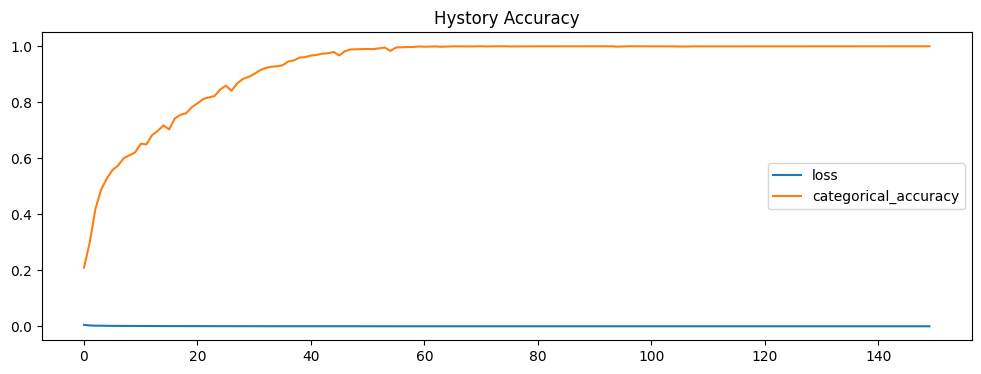

In [29]:
df_hystory = pd.DataFrame(hystory.history)
df_hystory.plot(figsize=(12, 4), title='Hystory Accuracy') # [['categorical_accuracy','val_categorical_accuracy']]

In [30]:
#df_hystory[['loss','val_loss']].plot(figsize=(12, 4), title='Hystory Loss')

In [31]:
predictions = model.predict(X_test)
df_predictions = pd.DataFrame(predictions, columns=['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
df_predictions

40/40 [==============================] - 0s 2ms/step


,NonDemented,VeryMildDemented,MildDemented,ModerateDemented
0,0.047039,0.952653,0.000120,0.000188
1,0.523986,0.457308,0.003002,0.015705
2,0.957304,0.038228,0.001860,0.002608
3,0.135776,0.863761,0.000042,0.000421
4,0.007504,0.971713,0.017301,0.003482
...,...,...,...,...
1274,0.011170,0.987102,0.001590,0.000139
1275,0.419951,0.579713,0.000154,0.000182
1276,0.001104,0.998233,0.000530,0.000133
1277,0.064021,0.935750,0.000017,0.000212


In [32]:
# convert df_predictions to labels
labels_predictions = []
for i in range(len(df_predictions)):
    labels_predictions.append(df_predictions.iloc[i].idxmax())
labels_predictions = np.array(labels_predictions)
labels_predictions

array(['VeryMildDemented', 'NonDemented', 'NonDemented', ...,
       'VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented'],
      dtype='<U16')

In [33]:
# compute classification metrics
print(classification_report(labels_test, labels_predictions))

                  precision    recall  f1-score   support

    MildDemented       0.07      0.02      0.03       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.45      0.17      0.24       640
VeryMildDemented       0.34      0.75      0.46       448

        accuracy                           0.35      1279
       macro avg       0.21      0.23      0.18      1279
    weighted avg       0.35      0.35      0.29      1279



/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

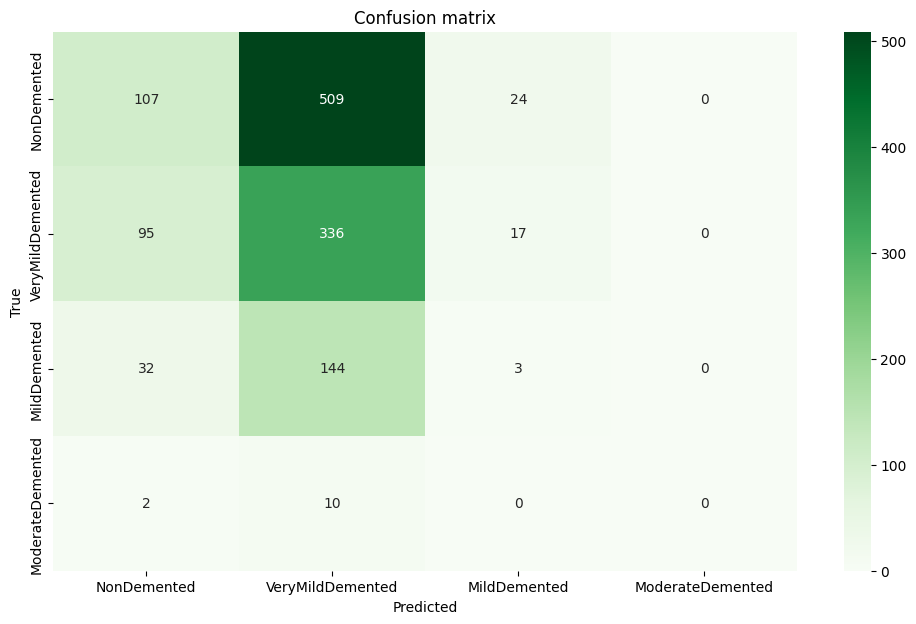

In [34]:
# confusion matrix
cm = confusion_matrix(labels_test, labels_predictions, labels=['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.xticks(np.arange(4) + 0.5, ['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.yticks(np.arange(4) + 0.5, ['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.show()